Привет, меня зовут Гребенюк Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>Success:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Hello World!
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- У меня есть пара ремарок, которые помогут тебе сделать проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-info">
    
### Приветствую, Артём!
</div>

<div class="alert alert-block alert-success">
<b>Общее впечатление v.2:</b> 
    
- Отличная работа над ремарками!
- Проект выглядит отлично и проходит ревью, поздравляю!
- Удачи в дальнейшем обучении :)

# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div style="border:solid darkblue 1px; padding: 20px">
    
##### Для данного исследования представлены 5 таблиц от "Мегалайн":
* 1. Таблица *users* (информация о пользователях). 8 столбцов 500 строк
* 2. Таблица *calls* (информация о звонках). 4 столбца 202607 строк
* 3. Таблица *messages* (информация о сообщениях). 3 столбца 123036 строк
* 4. Таблица *internet* (информация об интернет-сессиях). 5 столбцов 149396 строк
* 5. Таблица *tariffs* (информация о тарифах). 8 столбцов 2 строки
______

###### Данное исследование разделим на несколько частей.
    
##### Часть 1. Изучение общей информации:
* [1. Изученеие файла с данными, получение общей информации, загрузка библиотек.](#1-bullet)
    
##### Часть 2. Предобработка данных:
* [1. Приведение данных к нужным типам.](#2-bullet)
* [2. Ошибки в данных.](#3-bullet)
* [3. Количество сделанных звонков и израсходованных минут разговора по месяцам.](#4-bullet)
* [4. Количество отправленных сообщений по месяцам.](#5-bullet)
* [5. Объем израсходованного интернет-трафика по месяцам.](#6-bullet)
* [6. Помесячная выручка с каждого пользователя.](#7-bullet)

##### Часть 3. Анализ данных:
* [1. Поведение клиентов оператора.](#8-bullet)

    
##### Часть 4. Проверка гипотез:
* [1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.](#9-bullet)
* [2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#10-bullet)

    
##### Часть 5. Общий вывод:
* [Особенности данных + Ответ на целевой вопрос](#11-bullet)
    
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Очень хорошее начало

<a id='1-bullet'></a>

## Шаг 1. Изученеие файла с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats as st
matplotlib.style.use('ggplot')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [ ]:
df_names = ['users', 'calls', 'messages', 'internet', 'tariffs']
dict_df = {}
for df_name in df_names:
    dict_df[df_name] = pd.read_csv('/datasets/' + df_name + '.csv')
    display(dict_df[df_name])
    print(dict_df[df_name].info())

<div class="alert alert-block alert-success">
<b>Success:</b> Здорово, что просмотр датасетов автоматизирован - хорошая работа!
</div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
    
стоит отделять импорты от открытия датасета. Это делается для того, чтобы иметь возмонжность в любой момент дописать нвоые библиотеки, перезапустить ячейку с импортами и продолжить работу, не перетирая датасет.
</div>

<div class="alert alert-block alert-info">
    
✔ Хороший совет. Поправил. Спасибо!
</div>

<div style="border:solid blue 1px; padding: 20px">
    
##### Таблица "users" 
* Пропуски в данных только в таблице "users" столбец "churn_date". Заполнять не нужно, т.к. пропуск означает, что тариф еще действует.
* "reg_date" можно перевести в datetime
    
##### Таблица "calls"
* На первый взгляд "id" строится из "user_id" прибавлением цифры через знак "_". Для экономии места можно привести к int. Но не обязательно
* "duration" можно перевести в integer, округлив до целого вверх, потому как в "Мегалайн" поминутная тарификация
* "call_date" - в datetime
    
##### Таблица "messages"
* "id" - похожая ситуация как в таблице "calls"
* "message_date" - в datetime
    
##### Таблица "internet"
* "Unnamed: 0" - столбец дублирующий индекс. Чтобы не мешал, нужно от него избавиться
* "id" - похожая ситуация как в таблице "calls"
* "mb_used" - также как и "duration" в таблице "calls"
* "session_date" - в datetime
    
##### Таблица "internet"
* Тут все на месте
    
</div>

## Шаг 2. Предобработка данных

<a id='2-bullet'></a>

### 1. Приведение данных к нужным типам

In [2]:
#Для начала приведем в datetime столбцы с датами. Сделаем церез цикл. 
# Для этого создадим словарь, где укажем таблицы и столбцы с датами

dict_to_datetime = {'users': ['reg_date', 'churn_date'], 
                    'calls': ['call_date'], 
                    'messages': ['message_date'],
                    'internet': ['session_date']
                   }
for df_name in dict_to_datetime:
    for column_name in dict_to_datetime[df_name]:
        dict_df[df_name][column_name] = pd.to_datetime(dict_df[df_name][column_name], 
                                                       format='%Y-%m-%d')
        print(df_name, column_name, '\n', dict_df[df_name][column_name].describe(), '\n')


users reg_date 
 count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object 

users churn_date 
 count                      38
unique                     33
top       2018-10-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object 

calls call_date 
 count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object 

messages message_date 
 count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object 

internet session_date 
 count                  149396
unique       

In [3]:
# Теперь приведем к integer "duration" из "calls" и "mb_used" из "internet"

dict_df['calls']['duration'] = (dict_df['calls']['duration']
                                .apply(lambda x: math.ceil(x))
                                .astype('int'))
print(dict_df['calls']['duration'].describe())
dict_df['internet']['mb_used'] = (dict_df['internet']['mb_used']
                                  .apply(lambda x: math.ceil(x))
                                  .astype('int'))
dict_df['internet']['mb_used'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64


count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

<div class="alert alert-block alert-success">
<b>Success:</b> Хорошо, что не забыли про округление
</div>

<div style="border:solid blue 1px; padding: 20px">
    
* Странно, что СМСок 1 января никто не писал, хотя звонки и интернет-сессии были.
    
</div>

<a id='3-bullet'></a>

### 2. Ошибки в данных

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64


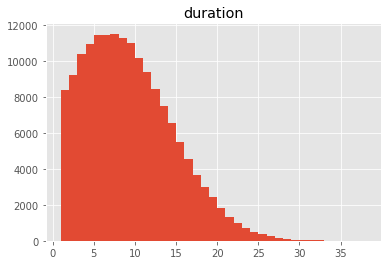

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f0b4b59d0>]],
      dtype=object)

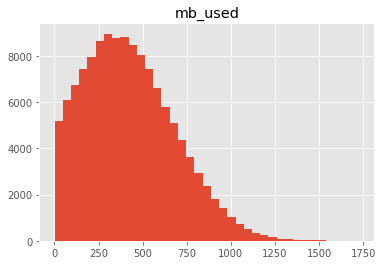

In [33]:
# Избавимся от "Unnamed: 0" в таблице "internet"
dict_df['internet'] = dict_df['internet'].loc[:, ~dict_df['internet'].columns.str.contains('^Unnamed')]

# Нулевые длительности звонков. Если их убрать то гистограмма - просто загляденье (распределение Пуассона)
print(dict_df['calls'][dict_df['calls']['duration'] != 0]['duration'].describe())
dict_df['calls'][dict_df['calls']['duration'] != 0].hist('duration', bins=37)
plt.show()
# Но если оставляем нули то среднее и медина смещаются влево на 2 минуты
print(dict_df['calls']['duration'].describe())
dict_df['internet'][dict_df['internet']['mb_used'] != 0].hist('mb_used', bins=37)

<div class="alert alert-block alert-warning">
<b>Remarks:</b> нужен вывод по нулевым звонкам и интернет-сессиям. Обрати внимание, что и пропуски в этих столбцах есть тоже
</div>

<div class="alert alert-block alert-info">

* Гистограммы без нулей выглядят нормально. Если оставляем нули то среднее и медина смещаются влево на 2 минуты для звонков
* Нулевые значения длительности звонков и интернет-сессий для надежности можно заменить на NaN, если мы боимся ошибок при расчете средних значений
</div>

<div style="border:solid blue 1px; padding: 20px">
    
* Критичных ошибок обнаружить не удалось. Посмотрим далее при составлении сводных таблиц для расчета выручки
    
</div>

<a id='4-bullet'></a>

### 3. Количество сделанных звонков и израсходованных минут разговора по месяцам.

In [5]:
dict_df['calls']['month'] = dict_df['calls']['call_date'].dt.month

users_calls_per_month = (dict_df['calls'][dict_df['calls']['duration'] != 0]
                         .pivot_table(index=['user_id', 'month'],
                                      values='duration',
                                      aggfunc=['count', 'sum']))
users_calls_per_month.columns = ['count', 'duration']
users_calls_per_month.reset_index(inplace=True)
print(users_calls_per_month.describe())

           user_id        month        count     duration
count  3168.000000  3168.000000  3168.000000  3168.000000
mean   1251.477588     8.317551    51.450126   457.797033
std     144.574946     2.907181    26.439188   237.423514
min    1000.000000     1.000000     1.000000     1.000000
25%    1126.000000     6.000000    33.000000   290.750000
50%    1254.000000     9.000000    50.000000   447.500000
75%    1379.000000    11.000000    67.000000   592.250000
max    1499.000000    12.000000   190.000000  1673.000000


In [6]:
#Проверим пользователей, не совершивших звонков
users_with_calls = users_calls_per_month['user_id'].unique()
users_no_calls = dict_df['users'].query('user_id not in @users_with_calls')
display(users_no_calls)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


<div style="border:solid blue 1px; padding: 20px">
    
* Всего 492 пользователя. Значит 8 не совершили ни одного звонка за 2018
* Двое из них не успели попользоваться тарифом и месяца. Остальные возможно пользовались другими услугами. Проверим ниже
    
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Отлично
</div>

<a id='5-bullet'></a>

### 4. Количество отправленных сообщений по месяцам.

In [7]:
dict_df['messages']['month'] = dict_df['messages']['message_date'].dt.month

users_messages_per_month = (dict_df['messages']
                            .pivot_table(index=['user_id', 'month'],
                                         values='id',
                                         aggfunc='count'))
users_messages_per_month.columns = ['count']
users_messages_per_month.reset_index(inplace=True)
print(users_messages_per_month)

      user_id  month  count
0        1000      5     22
1        1000      6     60
2        1000      7     75
3        1000      8     81
4        1000      9     57
...       ...    ...    ...
2712     1498     10     42
2713     1499      9     11
2714     1499     10     48
2715     1499     11     59
2716     1499     12     66

[2717 rows x 3 columns]


In [8]:
#Проверим пользователей, не писавших СМС в 2018
users_with_messages = users_messages_per_month['user_id'].unique()
users_no_messages = dict_df['users'].query('user_id not in @users_with_messages')
display(users_no_messages)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
10,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart
17,1017,73,NaT,Краснодар,Мария,Аленникова,2018-05-22,smart
24,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
...,...,...,...,...,...,...,...,...
462,1462,72,NaT,Тольятти,Алёна,Абрамычева,2018-10-29,smart
466,1466,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
469,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra
479,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart


<div style="border:solid blue 1px; padding: 20px">
    
* Здесь уже 74 пользователя. Не пользоваться СМС в 2018 - нормальная тенденция (мессенджеры удобнее)
    
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Хорошо!
</div>

<a id='6-bullet'></a>

### 5. Объем израсходованного интернет-трафика по месяцам.

In [30]:
dict_df['internet']['month'] = dict_df['internet']['session_date'].dt.month

users_internet_per_month = (dict_df['internet']
                            .pivot_table(index=['user_id', 'month'],
                                         values='mb_used',
                                         aggfunc='sum'))
users_internet_per_month.columns = ['mb_used']
users_internet_per_month.reset_index(inplace=True)
print(users_internet_per_month.describe())

           user_id        month       mb_used
count  3203.000000  3203.000000   3203.000000
mean   1251.393069     8.320949  17286.749610
std     144.824407     2.903834   7523.580332
min    1000.000000     1.000000      0.000000
25%    1124.000000     6.000000  12543.000000
50%    1251.000000     9.000000  16985.000000
75%    1379.000000    11.000000  21455.500000
max    1499.000000    12.000000  49789.000000


In [10]:
#Сколько "староверов" в 2018, кто не пользуется интернетом
users_with_internet = users_internet_per_month['user_id'].unique()
users_no_internet = dict_df['users'].query('user_id not in @users_with_internet')
display(users_no_internet)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
273,1273,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


<div style="border:solid blue 1px; padding: 20px">
    
* Всего трое, двое из которых почти сразу прекратили пользоваться тарифом
    
</div>

In [11]:
#Консолидируем пользователей, не воспользовавшихся ни одной улугой
users_no_services = dict_df['users'].query('user_id not in @users_with_calls and '
                                           'user_id not in @users_with_messages and '
                                           'user_id not in @users_with_internet '
                                           )
display(users_no_services)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


<div style="border:solid blue 1px; padding: 20px">
    
* В итоге те самые двое, которые в декабре открыли и закрыли тариф, не воспользовались ни одной услугой. Они не попадают ни в одну из сводных таблиц созданных выше. Следовательно при подсчете выручки и консолидации учитываться не будут, что вполне правомерно. Их всего 2 из 500
    
</div>

<a id='7-bullet'></a>

### 6. Помесячная выручка с каждого пользователя.

In [12]:
#revenue_by_users_per_month = users_internet_per_month.join(dict_df['users'][['user_id', 'tariff']], 
#                                                           on='user_id')
#print(revenue_by_users_per_month)
dict_df['users'][['user_id', 'tariff']]


def revenue_calls_overlimit(row):
    #найти тариф по 'user_id'
    tariff = dict_df['users'][dict_df['users']['user_id']==row['user_id']]['tariff'].array[0]
    #найти лимит звонков по 'tariff_name', стоимость минуты сверх лимита и абонентскую плату
    tariff_data = dict_df['tariffs'][dict_df['tariffs']['tariff_name']==tariff]
    calls_limit = tariff_data['minutes_included'].array[0]
    rub_per_minute = tariff_data['rub_per_minute'].array[0]
    #rub_monthly_fee = tariff_data['rub_monthly_fee'].array[0]
    #посчитать сколько минут вышло за лимит и вернуть выручку от звонков
    if row['duration']-calls_limit>0:
        row['revenue_calls'] = (row['duration'] - calls_limit) * rub_per_minute
    else:
        row['revenue_calls'] = 0
    return row
    
users_calls_per_month = users_calls_per_month.apply(revenue_calls_overlimit, axis=1)
print(users_calls_per_month.describe())


           user_id        month        count     duration  revenue_calls
count  3168.000000  3168.000000  3168.000000  3168.000000    3168.000000
mean   1251.477588     8.317551    51.450126   457.797033      87.821023
std     144.574946     2.907181    26.439188   237.423514     220.567755
min    1000.000000     1.000000     1.000000     1.000000       0.000000
25%    1126.000000     6.000000    33.000000   290.750000       0.000000
50%    1254.000000     9.000000    50.000000   447.500000       0.000000
75%    1379.000000    11.000000    67.000000   592.250000       0.000000
max    1499.000000    12.000000   190.000000  1673.000000    2805.000000


<div class="alert alert-block alert-success">
<b>Success:</b> Хорошая функция, но если ты хочешь её документировать, то лучше оформляй пояснения правильно - в виде докстринга по pep-257
</div>

<div class="alert alert-block alert-info">

Спасибо! Буду изучать
</div>

<div style="border:solid blue 1px; padding: 20px">
    
* 75% нулей в revenue_calls. Это значит, что в большинстве случаев пользователи укладываются в отведенный пакет минут на месяц.
    
</div>

In [13]:
def revenue_messages_overlimit(row):
    #найти тариф по 'user_id'
    tariff = dict_df['users'][dict_df['users']['user_id']==row['user_id']]['tariff'].array[0]
    #найти лимит СМС по 'tariff_name', стоимость СМС сверх лимита и абонентскую плату
    tariff_data= dict_df['tariffs'][dict_df['tariffs']['tariff_name']==tariff]
    messages_limit = tariff_data['messages_included'].array[0]
    rub_per_message = tariff_data['rub_per_message'].array[0]
    #rub_monthly_fee = tariff_data['rub_monthly_fee'].array[0]
    #посчитать сколько минут вышло за лимит и вернуть выручку от звонков
    if row['count']-messages_limit>0:
        return (row['count'] - messages_limit) * rub_per_message
    return 0
users_messages_per_month['revenue_messages'] = (users_messages_per_month
                                                .apply(revenue_messages_overlimit, axis=1))
#users_messages_per_month['revenue_messages'].hist()
print(users_messages_per_month.describe())

           user_id        month        count  revenue_messages
count  2717.000000  2717.000000  2717.000000       2717.000000
mean   1255.635259     8.345234    45.283769         14.274568
std     146.227484     2.892920    35.051363         37.131078
min    1000.000000     1.000000     1.000000          0.000000
25%    1126.000000     6.000000    19.000000          0.000000
50%    1266.000000     9.000000    38.000000          0.000000
75%    1384.000000    11.000000    63.000000          0.000000
max    1499.000000    12.000000   224.000000        279.000000


<div style="border:solid blue 1px; padding: 20px">
    
* СМС отживают свое - максимальная выручка за месяц с пользователя 279руб
    
</div>

In [14]:
def revenue_internet_overlimit(row):
    #найти тариф по 'user_id'
    tariff = dict_df['users'][dict_df['users']['user_id']==row['user_id']]['tariff'].array[0]
    #найти лимит СМС по 'tariff_name', стоимость СМС сверх лимита и абонентскую плату
    tariff_data= dict_df['tariffs'][dict_df['tariffs']['tariff_name']==tariff]
    mb_limit = tariff_data['mb_per_month_included'].array[0]
    rub_per_gb = tariff_data['rub_per_gb'].array[0]
    rub_monthly_fee = tariff_data['rub_monthly_fee'].array[0]
    #посчитать сколько минут вышло за лимит и вернуть выручку от звонков
    if row['mb_used']-mb_limit>0:
        row['revenue_internet'] = (row['mb_used'] - mb_limit) / 1024 * rub_per_gb
    else: 
        row['revenue_internet'] = 0
    return row
    
users_internet_per_month = users_internet_per_month.apply(revenue_internet_overlimit, axis=1)
print(users_internet_per_month.describe())
#users_internet_per_month['revenue_internet'].hist()

           user_id        month       mb_used  revenue_internet
count  3203.000000  3203.000000   3203.000000       3203.000000
mean   1251.393069     8.320949  17286.749610        410.570397
std     144.824407     2.903834   7523.580332        650.254562
min    1000.000000     1.000000      0.000000          0.000000
25%    1124.000000     6.000000  12543.000000          0.000000
50%    1251.000000     9.000000  16985.000000          0.000000
75%    1379.000000    11.000000  21455.500000        688.378906
max    1499.000000    12.000000  49789.000000       4541.015625


<div style="border:solid blue 1px; padding: 20px">
    
* А вот интернет напротив - наибольшая средняя выручка и максимум по перерасходу. И если как минимум 75% пользователей обходились пакетом звонков, то пакета интернет-трафика на месяц хватает 50-75% пользовтелей
    
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Хорошая промежуточная аналитика
</div>

In [15]:
#Объединим траты по статьям в одну таблицу
monthly_revenue_per_user = (users_calls_per_month[['user_id', 'month', 'revenue_calls']]
                            .merge(users_messages_per_month[['user_id', 'month', 'revenue_messages']],
                                   how='outer',
                                   on=['user_id', 'month']))
monthly_revenue_per_user = (monthly_revenue_per_user
                            .merge(users_internet_per_month[['user_id', 'month', 'revenue_internet']],
                                   how='outer',
                                   on=['user_id', 'month']))


In [16]:
#Посчитаем траты по каждому пользователю в столбце 'revenue_per_user'
monthly_revenue_per_user = monthly_revenue_per_user.merge(dict_df['users'][['user_id', 'tariff', 'city']], 
                                                          on='user_id',
                                                          how='outer')
monthly_revenue_per_user = (pd.merge(
                                    monthly_revenue_per_user,
                                    dict_df['tariffs'][['tariff_name', 'rub_monthly_fee']].set_index('tariff_name'), 
                                    left_on='tariff',
                                    right_index=True))
#В таблице будут пустые значения, т.к. не каждый пользователь использует все три услуги (см. шаг 2 п. 5)
#Можно заменить их нулями
monthly_revenue_per_user.fillna(0, inplace=True)
monthly_revenue_per_user['revenue_per_user'] = (monthly_revenue_per_user['revenue_calls'] +
                                                monthly_revenue_per_user['revenue_messages'] +
                                                monthly_revenue_per_user['revenue_internet'] +
                                                monthly_revenue_per_user['rub_monthly_fee'])
print(monthly_revenue_per_user.describe())
print(monthly_revenue_per_user.info())

           user_id        month  revenue_calls  revenue_messages  \
count  3216.000000  3216.000000    3216.000000       3216.000000   
mean   1251.588930     8.312189      86.510261         12.059701   
std     144.645928     2.911903     219.173942         34.517318   
min    1000.000000     0.000000       0.000000          0.000000   
25%    1125.000000     6.000000       0.000000          0.000000   
50%    1253.000000     9.000000       0.000000          0.000000   
75%    1378.250000    11.000000       0.000000          0.000000   
max    1499.000000    12.000000    2805.000000        279.000000   

       revenue_internet  rub_monthly_fee  revenue_per_user  
count       3216.000000      3216.000000       3216.000000  
mean         408.910753       979.228856       1486.709572  
std          649.461405       645.610249        783.935879  
min            0.000000       550.000000        550.000000  
25%            0.000000       550.000000        694.000000  
50%            0.0000

<div style="border:solid blue 1px; padding: 20px">
    
* Средние траты пользователей в месяц 1481 руб. Далее посмотрим на каком тарифе траты выше
    
</div>

## Шаг 3. Анализ данных

<a id='8-bullet'></a>

### 1. Поведение клиентов оператора. Минуты, СМС и интернет трафик каждого тарифа

              mean           var         std
          duration      duration    duration
tariff                                      
smart   419.440342  35718.128534  188.992403
ultra   547.755016  93338.428291  305.513385 

smart
           user_id        month        count     duration  revenue_calls
count  2221.000000  2221.000000  2221.000000  2221.000000    2221.000000
mean   1245.789734     8.349392    47.116614   419.440342     125.266547
std     145.853596     2.917705    20.887092   188.992403     254.382306
min    1001.000000     1.000000     1.000000     2.000000       0.000000
25%    1121.000000     6.000000    32.000000   285.000000       0.000000
50%    1239.000000     9.000000    48.000000   423.000000       0.000000
75%    1376.000000    11.000000    61.000000   546.000000     138.000000
max    1499.000000    12.000000   162.000000  1435.000000    2805.000000 

ultra
           user_id       month       count     duration  revenue_calls
count   947.000000  947.000000 

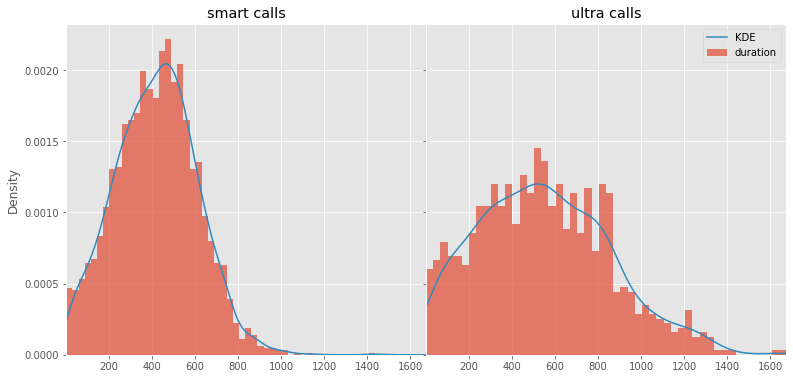

             mean          var        std
            count        count      count
tariff                                   
smart   38.716441   717.594201  26.787949
ultra   61.161006  2109.659183  45.931026 

smart
           user_id        month        count  revenue_messages
count  1922.000000  1922.000000  1922.000000       1922.000000
mean   1248.711759     8.322060    38.716441         20.178980
std     147.491929     2.929116    26.787949         42.779524
min    1002.000000     1.000000     1.000000          0.000000
25%    1123.000000     6.000000    17.000000          0.000000
50%    1246.000000     9.000000    34.000000          0.000000
75%    1384.000000    11.000000    55.000000         15.000000
max    1499.000000    12.000000   143.000000        279.000000 

ultra
           user_id       month       count  revenue_messages
count   795.000000  795.000000  795.000000             795.0
mean   1272.373585    8.401258   61.161006               0.0
std     141.824909    2.

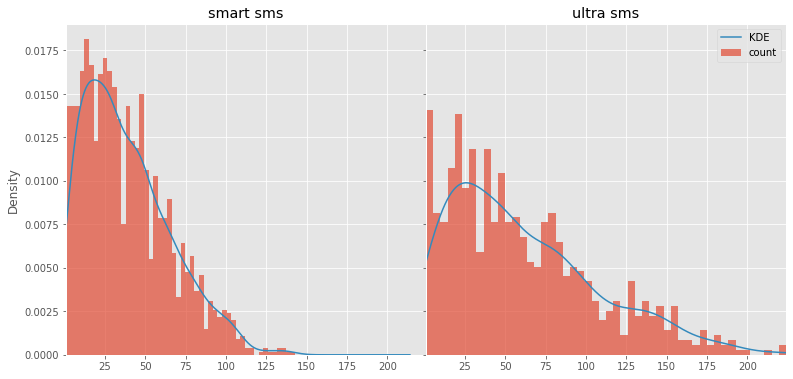

                mean           var          std
             mb_used       mb_used      mb_used
tariff                                         
smart   16236.472621  3.444310e+07  5868.824472
ultra   19686.767179  9.904344e+07  9952.057054 

smart
           user_id        month       mb_used  revenue_internet
count  2228.000000  2228.000000   2228.000000       2228.000000
mean   1246.416966     8.346948  16236.472621        541.375656
std     146.091122     2.920962   5868.824472        704.043580
min    1001.000000     1.000000      0.000000          0.000000
25%    1121.000000     6.000000  12668.500000          0.000000
50%    1239.000000     9.000000  16532.000000        228.906250
75%    1376.000000    11.000000  20068.000000        919.531250
max    1499.000000    12.000000  38610.000000       4541.015625 

ultra
           user_id       month       mb_used  revenue_internet
count   975.000000  975.000000    975.000000        975.000000
mean   1262.764103    8.261538  19686.7671

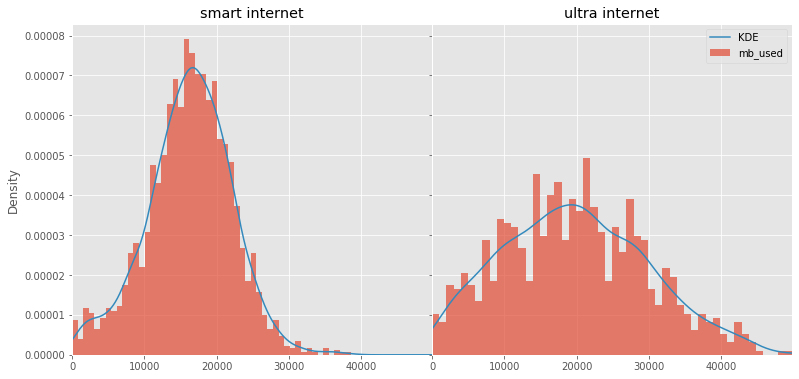

In [17]:
#Посчитаем численные характеристики данных минут, СМС и интернет трафика
#по месяцам в зависимости от тарифа

user_behavior_dict = {'calls': {'df': users_calls_per_month, 'column': 'duration'},
                      'sms': {'df': users_messages_per_month, 'column': 'count'},
                      'internet': {'df': users_internet_per_month, 'column': 'mb_used'}
                     }

for data in user_behavior_dict:
    metrics_df = user_behavior_dict[data]['df'].merge(dict_df['users'][['user_id', 'tariff']],on='user_id')
    metric = user_behavior_dict[data]['column']
    print(metrics_df
         .pivot_table(index='tariff', 
                      values=metric, 
                      aggfunc=[np.mean, np.var, np.std]), '\n')
# Графики покажем рядом в одинаковом масштабе по х и у
    fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True)
    for ind, tariff in enumerate(['smart', 'ultra']):
        metrics_df[metrics_df['tariff']==tariff][metric].plot(kind='hist', 
                                                              title=tariff+' '+data, 
                                                              density=True,
                                                              bins=50,
                                                              ax=axes[ind],
                                                              figsize=(20,5), alpha=0.7)

        metrics_df[metrics_df['tariff']==tariff][metric].plot(kind='kde', 
                                                              title=tariff+' '+data,
                                                              label='KDE',
                                                              ax=axes[ind],
                                                              figsize=(20,5))
        print(tariff)
        print(metrics_df[metrics_df['tariff']==tariff].describe(), '\n')
        plt.xlim(min(metrics_df[metric]), max(metrics_df[metric]))
    plt.legend(loc="upper right")    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.6, hspace=0.05, wspace=0.0)
    plt.show()


<div style="border:solid blue 1px; padding: 20px">
    
####  Звонки
* На удивление при разнице пакетов минут в 6 раз, средние отличаются не более 31%
* На тарифе *Ультра* ни разу не выбран покет минут полностью. Когда на *Смарт* более четверти пользователей перебирают с выделенными минутами
    
####  СМС
* Тут наблюдается очень похожая картина как со звонками. Разница средних несравнима с разницей пакетов
* С Пользователи *Ультра* не приносят доп выручки от СМС. А вот *Смартовцы* напротив переплачивают, хотя и не много (максимум 279)
    
####  Интернет
* Здесь статистика еще более не в пользу юзеров *Смарт* - в среднем они перебирают с пакетом трафика, причем делает так более половины пользователей
* *Ультра* напритив дает более 50% пользователей оставться в рамках отведенного пакета 
    
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Здорово, весьма подробно
</div>

## Шаг 4. Проверка гипотез

<a id='9-bullet'></a>

### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [21]:
# Сформулируем Но: Средние показатели выручки пользователей тарифов "Ультра" и "Смарт" различаются.
# Из нее вытекает Н1: Средние показатели выручки не различаюся
# Посчитаем средние. 
print(monthly_revenue_per_user.pivot_table(index='tariff',
                                           values='revenue_per_user', 
                                           aggfunc=[np.mean, np.var, np.std]))
# 1233 и 2061 разница на первый взгляд весомая. Но она может быть случайной, и тогда придется отвергнуть Но
# Определим на сколько случайна разница средних t-тестом и выведем p-value
# Чем оно мень, тем больше вероятность неслучайности разницы (т.е. различности средних). 
# Пороговое значение возьмем 5%. Таким образом условием, когда Но отвергается будет p-value > 5%
alpha = .05
smart_revenue = monthly_revenue_per_user.query('tariff == "smart"')['revenue_per_user']
ultra_revenue = monthly_revenue_per_user.query('tariff == "ultra"')['revenue_per_user']
results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


                   mean              var              std
       revenue_per_user revenue_per_user revenue_per_user
tariff                                                   
smart       1233.043032    620383.654857       787.644371
ultra       2060.417872    126836.789215       356.141530
p-value: 3.665639404941842e-296
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> 
    
Нужно явно расписывать мотивацию при выборе параметра `equal_var`. Нужно исправить тут и далее
Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки.
    
Также лучше сначала собрать датафреймы в переменных и их передать в функцию. Декомпозируй сложные конструкции - пиши чистый код :)
</div>

<div class="alert alert-block alert-info">

Потерял `equal_var` из виду. Сейчас добавил. Опция 'equal_var = False' выполняет t-тест Уэлча, который не предполагает равную дисперсию. Как раз наш случай, если ее посчитать. Спасибо!
</div>

<div style="border:solid blue 1px; padding: 20px">
    
* Крайне низкая вероятность случайности различий средней выручки по тарифам. Следовательно мы не можем отвергнуть гипотезу о различии средней выручки по тарифам
    
</div>

<a id='10-bullet'></a>

### 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [35]:
#Здесь аналогично предыдущему пункту: различается - значит разница средних неслучайна (Не отвергаем)
#Не различается - значит случайна (Отвергаем)
#На сколько случайна покажет все тот же p-value.
# Посчитаем среднюю выручку по Москве и регионам
monthly_revenue_per_user['region'] = (monthly_revenue_per_user['city']
                                      .apply(lambda row: 'Moscow' if row=='Москва' else 'other'))
print(monthly_revenue_per_user.pivot_table(index='region',
                                           values='revenue_per_user', 
                                           aggfunc=[np.mean, np.var, np.std]))
moscow_revenue = monthly_revenue_per_user.query('region == "Moscow"')['revenue_per_user']
region_revenue = monthly_revenue_per_user.query('region == "other"')['revenue_per_user']
results = st.ttest_ind(moscow_revenue, region_revenue, equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

                   mean              var              std
       revenue_per_user revenue_per_user revenue_per_user
region                                                   
Moscow      1507.276762    547242.749893       739.758575
other       1481.885559    630437.271203       794.000801
p-value: 0.4517561756356935
Отвергаем нулевую гипотезу


<div style="border:solid blue 1px; padding: 20px">
    
* Вероятность, что средние выручки отличаются как (1507-1482) или более довольно высокая - 47%. Следовательно отвергаем гипотезу о том, что средние выручки Москвы и регионов отличаются
    
</div>

<a id='11-bullet'></a>

## Шаг 5. Общий вывод

<div style="border:solid blue 1px; padding: 20px">
    
* Минуты и мегабайты округлили до целого, т.к. тарификация поминутная и помегабайтная
* Лишний столбец индексов в таблице с интернет-сессиями. Избавились
* Два пользователя, не воспользовавшись ни одной из услуг, прекратили пользование тарифом в течение 7 дней. Их мы учитывать не стали
* При подсчете выручки были использованы функции. Хотя код более наглядный, алгоритм выполняется гораздо дольше в сравнении с простым объединением таблиц.

#### Поведение пользователей
    
* Превышение пакета звонков у *Смарт* довольно высокое. Когда *Ультра* всегда укладывается в отведенные пакетом минуты
* СМС такая же ситуация
* С интернетом перебор по каждому тарифу. Однако у *Смарт* по количеству пользователей в месяц он горздо выше
    
#### Различие средних
    
* При почти 4х кратной разнице в абон. плате, средние выручки по тарифам отличаются не более 70%. С точки зрения распределения средних различия не случайны
* А вот по регионам разницы особой не наблюдается и статистически можно отнести различие к случайному
    
#### Кто лучше
    
* С точки зрения среднего клиента тариф *Смарт* все же дешевле. Но все же есть определенная доля пользователей, которым будет выгоднее совершить переход на *Ультра* для сокращения расходов, т.к. в крйних случаях переплаты превышают абон. плату *Ультра*
* С точки зрения оператора, стоит задуматься о введении промежуточного тарифа
* Также стоит задуматься о введении безлимитного интернета.
    
</div>

<div class="alert alert-block alert-info">

Артём, спасибо за замечания! Постарался всё поправить
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Очень хороший подробный общий вывод. Отличная работа!
</div>